# ----------------------------------------------------------------------
# Supervised Learning - Logistic Regression
# ----------------------------------------------------------------------

## Building a Student Performace Prediction System


# Classification vs. Regression
The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?
Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance

# Exploring the Data - Reading the dataset file using pandas. Take care about the delimiter.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read dataset using pandas
sd = pd.read_csv("students-data.csv", delimiter=";")

In [3]:
sd.shape

(395, 33)

In [4]:
sd.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
sd.tail(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


# Q1. Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*
*Use .dropna() function to drop the NAs*

#### Answer:

In [6]:
sd.index.name = 'number'

In [7]:
sd.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
sd.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [9]:
print("\nThere are no missing values in the dataset.\n")


There are no missing values in the dataset.




# Q2. Transform Data


*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [10]:
sd.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [11]:
cat_columns = sd.select_dtypes(include=object, exclude='number')

In [12]:
num_columns = sd.select_dtypes(include='number', exclude=object)

In [13]:
print("Shape of Categorical Columns is :\n{}\n\nShape of Numerical Columns is :\n{}\n".format(cat_columns.shape, num_columns.shape))

Shape of Categorical Columns is :
(395, 17)

Shape of Numerical Columns is :
(395, 16)



In [14]:
print("Categorical Columns are :\n{}\n\nNumerical Columns are :\n{}\n".format(cat_columns.columns, num_columns.columns))

Categorical Columns are :
Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

Numerical Columns are :
Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')



# Q3. Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1. Use .var function to check the variance*

#### Answer:

In [15]:
num_columns.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [16]:
for colname in num_columns.columns :
 if num_columns[colname].var() < 1 :
   print(colname)
   sd.drop(colname, axis=1, inplace=True)

traveltime
studytime
failures
famrel
freetime
Dalc


#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

# Q4. Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()

In [19]:
for colname in cat_columns.columns :
  print(colname)
  sd[colname] = le.fit_transform(sd[colname])

school
sex
address
famsize
Pstatus
Mjob
Fjob
reason
guardian
schoolsup
famsup
paid
activities
nursery
higher
internet
romantic


In [20]:
sd.head(10).T

number,0,1,2,3,4,5,6,7,8,9
school,0,0,0,0,0,0,0,0,0,0
sex,0,0,0,0,0,1,1,0,1,1
age,18,17,15,15,16,16,16,17,15,15
address,1,1,1,1,1,1,1,1,1,1
famsize,0,0,1,0,0,1,1,0,1,0
Pstatus,0,1,1,1,1,1,1,0,0,1
Medu,4,1,1,4,3,4,2,4,3,3
Fedu,4,1,1,2,3,3,2,4,2,4
Mjob,0,0,0,1,2,3,2,2,3,2
Fjob,4,2,2,3,2,2,2,4,2,2


In [21]:
sd.dtypes

school        int32
sex           int32
age           int64
address       int32
famsize       int32
Pstatus       int32
Medu          int64
Fedu          int64
Mjob          int32
Fjob          int32
reason        int32
guardian      int32
schoolsup     int32
famsup        int32
paid          int32
activities    int32
nursery       int32
higher        int32
internet      int32
romantic      int32
goout         int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object

# Q5. Convert the continuous values of grades into classes 

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [22]:
sd[['G1', 'G2', 'G3']].T

number,0,1,2,3,4,5,6,7,8,9,...,385,386,387,388,389,390,391,392,393,394
G1,5,5,7,15,6,15,12,6,16,14,...,10,6,7,7,6,9,14,10,11,8
G2,6,5,8,14,10,15,12,5,18,15,...,9,5,5,9,5,9,16,8,12,9
G3,6,6,10,15,10,15,11,6,19,15,...,10,6,0,8,0,9,16,7,10,9


In [23]:
sd[['G1', 'G2', 'G3']] = sd[['G1', 'G2', 'G3']].where(sd[['G1', 'G2', 'G3']] < 10, other=1)

In [24]:
sd[['G1', 'G2', 'G3']].T

number,0,1,2,3,4,5,6,7,8,9,...,385,386,387,388,389,390,391,392,393,394
G1,5,5,7,1,6,1,1,6,1,1,...,1,6,7,7,6,9,1,1,1,8
G2,6,5,8,1,1,1,1,5,1,1,...,9,5,5,9,5,9,1,8,1,9
G3,6,6,1,1,1,1,1,6,1,1,...,1,6,0,8,0,9,1,7,1,9


In [25]:
sd[['G1', 'G2', 'G3']] = sd[['G1', 'G2', 'G3']].where(sd[['G1', 'G2', 'G3']] == 1, other=0)

In [26]:
sd[['G1', 'G2', 'G3']].T

number,0,1,2,3,4,5,6,7,8,9,...,385,386,387,388,389,390,391,392,393,394
G1,0,0,0,1,0,1,1,0,1,1,...,1,0,0,0,0,0,1,1,1,0
G2,0,0,0,1,1,1,1,0,1,1,...,0,0,0,0,0,0,1,0,1,0
G3,0,0,1,1,1,1,1,0,1,1,...,1,0,0,0,0,0,1,0,1,0


In [27]:
sd.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1
5,0,1,16,1,1,1,4,3,3,2,...,1,1,0,2,2,5,10,1,1,1
6,0,1,16,1,1,1,2,2,2,2,...,1,1,0,4,1,3,0,1,1,1
7,0,0,17,1,0,0,4,4,2,4,...,1,0,0,4,1,1,6,0,0,0
8,0,1,15,1,1,0,3,2,3,2,...,1,1,0,2,1,1,0,1,1,1


In [28]:
sd.shape

(395, 27)

# Q6. Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.

#### Answer:

In [29]:
#Feature attributes
X = sd.drop('G3', axis=1)

#Target attribute
y = sd['G3']

In [30]:
print(X.shape, y.shape)

(395, 26) (395,)


In [31]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,goout,Walc,health,absences,G1,G2
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,1,0,0,4,1,3,6,0,0
1,0,0,17,1,0,1,1,1,0,2,...,0,1,1,0,3,1,3,4,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,1,0,2,3,3,10,0,0
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,1,2,1,5,2,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,1,0,0,2,2,5,4,0,1


In [32]:
y.head()

number
0    0
1    0
2    1
3    1
4    1
Name: G3, dtype: int64

## Visualization

# Q7. Plot G2 and G3 and give your understanding on relation between both variables.

### Hint: Use pd.crosstab(sd.G2,sd.G3).plot(kind='bar')

#### Answer:

In [33]:
pd.crosstab(sd['G1'], sd['G2'],margins=True, margins_name='Total')

G2,0,1,Total
G1,,,
0,118,24,142
1,28,225,253
Total,146,249,395


In [34]:
pd.crosstab(sd['G1'], sd['G3'],margins=True, margins_name='Total')

G3,0,1,Total
G1,,,
0,104,38,142
1,26,227,253
Total,130,265,395


In [35]:
pd.crosstab(sd['G2'], sd['G3'],margins=True, margins_name='Total')

G3,0,1,Total
G2,,,
0,122,24,146
1,8,241,249
Total,130,265,395


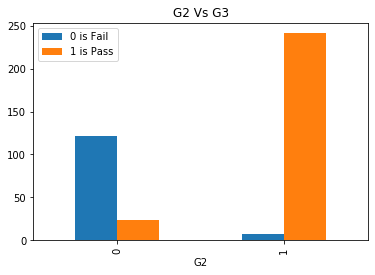

In [36]:
pd.crosstab(sd['G2'], sd['G3']).plot(kind='bar', title='G2 Vs G3')
l = plt.legend()
l.get_texts()[0].set_text("0 is Fail")
l.get_texts()[1].set_text("1 is Pass")

plt.show()

In [37]:
print("\nOut of total 365 students 249 have passed in G2(second period grade) and 146 students have failed in G2.")
print("\nOut of total 365 students 265 have passed in G3(final grade) and 130 students have failed in G3.")
print("\nOut of 249 students who have passed in G2, 241 students have also passed in G3 and remaining 8 students have failed in G3.")
print("\nOut of 146 students who have failed in G2, 122 students have also failed in G3 and remaining 24 students have passed in G3.")


Out of total 365 students 249 have passed in G2(second period grade) and 146 students have failed in G2.

Out of total 365 students 265 have passed in G3(final grade) and 130 students have failed in G3.

Out of 249 students who have passed in G2, 241 students have also passed in G3 and remaining 8 students have failed in G3.

Out of 146 students who have failed in G2, 122 students have also failed in G3 and remaining 24 students have passed in G3.


# Q8. Plot the number of students in each school and number of students with different ages in separate plots.

### Hint: use seaborn sns.countplot()

#### Answer:

In [38]:
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

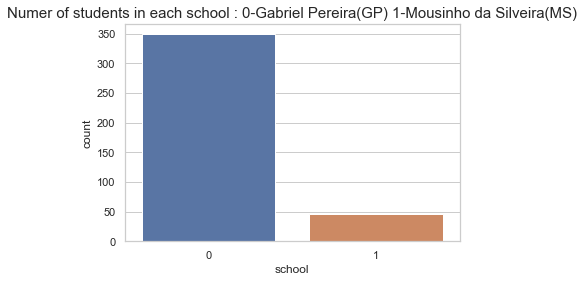

In [39]:
sns.countplot(x='school', data=sd)
plt.title("Numer of students in each school : 0-Gabriel Pereira(GP) 1-Mousinho da Silveira(MS)", fontsize=15)
plt.show()

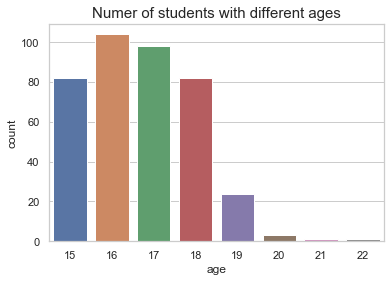

In [40]:
sns.countplot('age', data=sd)
plt.title("Numer of students with different ages", fontsize=15)
plt.show()

# Q9. Training and testing data split

 *So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=300, random_state=108)

In [43]:
print(X_train.shape, X_test.shape)

(300, 26) (95, 26)


In [44]:
print(y_train.shape, y_test.shape)

(300,) (95,)


# Q10. - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** functions in sklearn. 
* You need to import both Logistic regression and accuracy score from sklearn*

#### Answer:

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [46]:
lr_clf = LogisticRegression(solver='lbfgs', max_iter = 500, multi_class ='auto')

In [47]:
# Fit the model on training dataset.
lr_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
# Predict using Test dataset.
y_predict = lr_clf.predict(X_test)

In [49]:
# model accuracy score on Training data
lr_clf.score(X_train, y_train)

0.92

In [50]:
# model accuracy score on Test data
lr_clf.score(X_test, y_test)

0.9263157894736842

In [51]:
#Accuracy score using sklearn.metrics
accuracy_score(y_test, y_predict)

0.9263157894736842

In [52]:
#confusion matrix
confusion_matrix(y_test, y_predict)

array([[27,  3],
       [ 4, 61]], dtype=int64)

In [53]:
#precision score
precision_score(y_test, y_predict)

0.953125

In [54]:
#recall score
recall_score(y_test, y_predict)

0.9384615384615385

In [55]:
f1_score(y_test, y_predict)

0.9457364341085271

In [56]:
print("\nThe model accuracy score for Training data is 0.92 and Model accuracy score for Test data is 0.93")
print("This indicates the model is performing well on given dataset.")
print("High F1_score of 0.94 also indicates that model performance is good with Logistic Regresser")
print("Logistic Regresser algorithm is a good preference and can be used on this dataset.\n")


The model accuracy score for Training data is 0.92 and Model accuracy score for Test data is 0.93
This indicates the model is performing well on given dataset.
High F1_score of 0.94 also indicates that model performance is good with Logistic Regresser
Logistic Regresser algorithm is a good preference and can be used on this dataset.



# ----------------------------------------------------------------------
# Supervised Leaning - Naive Bayes with Iris Data
# ----------------------------------------------------------------------

In [57]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Import Iris.csv

In [58]:
# Load using input file
iris=pd.read_csv("Iris.csv")
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Treat NaN's/ Null values found

In [59]:
iris=iris.fillna(0)

### Slice  Iris data set for Independent variables and dependent variables

#### Please note 'Species' is your dependent variable, name it y and independent set data as X

In [60]:
X=iris.drop('Species', axis=1)
y=iris['Species']

In [61]:
#Check the dataset
y.head(5)

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [62]:
X.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


# Q1.  Find the distribution of target variable (Species) and, Plot the distribution of target variable using histogram

In [63]:
iris.groupby('Species').count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,52,52,52,52,52


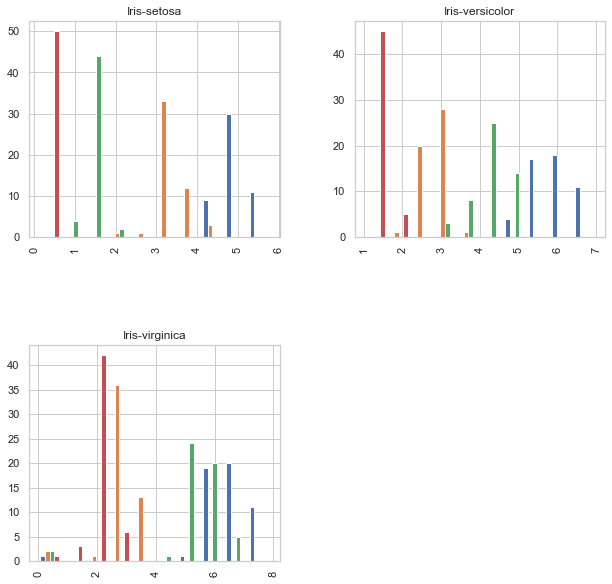

In [64]:
iris.drop('Id', axis=1).hist(by='Species', figsize=(10,10))
plt.show()

In [65]:
# Drop Id variable from data

In [66]:
iris.drop('Id', axis=1, inplace=True)

In [67]:
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# Q2. Find Correlation among all variables and give your insights 

In [68]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,0.145802,0.816560,0.668652
SepalWidthCm,0.145802,1.000000,-0.167316,-0.246073
PetalLengthCm,0.816560,-0.167316,1.000000,0.936151
PetalWidthCm,0.668652,-0.246073,0.936151,1.000000


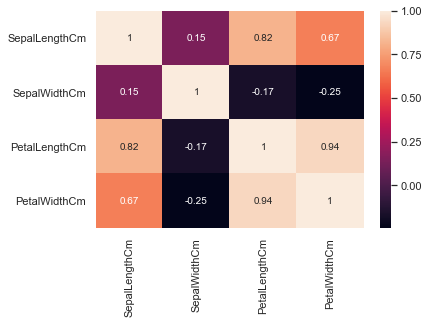

In [69]:
sns.heatmap(data=iris.corr(), annot=True)
plt.show()

In [70]:
print("There is a high correlation of 0.94 between Petallength and PetalWidth")
print("Correlation between PetalLength and SepalLength is also good with a value of 0.82")
print("Correlation between PetalWidth and SepalWidth is very low with negative value of -0.25")

There is a high correlation of 0.94 between Petallength and PetalWidth
Correlation between PetalLength and SepalLength is also good with a value of 0.82
Correlation between PetalWidth and SepalWidth is very low with negative value of -0.25


### Split data in Training and test set in 80:20.

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=4)

In [72]:
print("X_train_shape : {} y_train_shape : {} X_test_shape : {} y_test_shape : {}"
      .format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train_shape : (121, 5) y_train_shape : (121,) X_test_shape : (31, 5) y_test_shape : (31,)


# Q3. Feature Scaling on X_Train and X_Test

In [73]:
# Use StandardScaler or similar methods

In [74]:
#Feature scaling using Standard Scaler
from sklearn.preprocessing import StandardScaler

In [75]:
std_scl =StandardScaler()

In [76]:
X_train_scl = std_scl.fit_transform(X_train)

In [77]:
X_test_scl = std_scl.fit_transform(X_test)

In [78]:
print(X_train_scl.mean(), X_train_scl.var())

-2.8774044671276783e-16 1.0


In [79]:
print(X_test_scl.mean(), X_test_scl.var())

-1.5758004220486094e-16 1.0


In [80]:
#Feature scaling using zscore method
from scipy.stats import zscore

In [81]:
X_train_z = zscore(X_train)
X_test_z = zscore(X_test)

# Q4. Train and Fit NaiveBayes Model

In [82]:
#Fit the model using training data scaled using StandardScaler

In [83]:
gnb_clf = GaussianNB()

In [84]:
gnb_clf.fit(X_train_scl, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [85]:
#model accuracy score on Training data
gnb_clf.score(X_train_scl, y_train)

1.0

In [86]:
#model accuracy score on Test data
gnb_clf.score(X_test_scl, y_test)

0.6129032258064516

In [87]:
#Predict with test data scaled using StandardScaler 

In [88]:
y_predict = gnb_clf.predict(X_test_scl)

In [89]:
#Fit the model using training data scaled using zscore method

In [90]:
gnb_clf1 = GaussianNB()

In [91]:
gnb_clf1.fit(X_train_z, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [92]:
#model accuracy score on Training data
gnb_clf1.score(X_train_z, y_train)

1.0

In [93]:
#model accuracy score on Test data
gnb_clf1.score(X_test_z, y_test)

0.6129032258064516

In [94]:
#Predict with test data scaled using zscore method 

In [95]:
y_predict1 = gnb_clf.predict(X_test_z)

In [96]:
print("\nThe model accuracy score is the same when using Standardscaler or zscore method to scale the feature set\n ")


The model accuracy score is the same when using Standardscaler or zscore method to scale the feature set
 


# Q5.  Print Accuracy and Confusion Matrix and Conclude your findings

In [97]:
# show Confusion Matrix
from sklearn.metrics import confusion_matrix

In [98]:
confusion_matrix(y_test, y_predict)

array([[8, 6, 2],
       [0, 4, 4],
       [0, 0, 7]], dtype=int64)

In [99]:
#Show accuracy
from sklearn.metrics import accuracy_score

In [100]:
accuracy_score(y_test, y_predict)

0.6129032258064516

In [101]:
#Show precision and Recall metrics
from sklearn import metrics

In [102]:
#Precision score
metrics.precision_score(y_test, y_predict, average='weighted')

0.7409429280397022

In [103]:
#Recall score
metrics.recall_score(y_test, y_predict, average='weighted')

0.6129032258064516

In [104]:
#f1_score
metrics.f1_score(y_test, y_predict, average='weighted')

0.6168458781362006

In [105]:
print("\nThe model accuracy score for Training data is 1.0 and Model accuracy score for Test data is 0.61")
print("This indicates the model is not performing very well on given dataset.")
print("Low Recall, Precision and F1_scores also indicate that model performance is not very good with Naive Baiyes Classifier")
print("As the f1_score is not very good, the model performance is average and so Naive Bayes classifier is not a preferable method which can be used for this dataset.\n")


The model accuracy score for Training data is 1.0 and Model accuracy score for Test data is 0.61
This indicates the model is not performing very well on given dataset.
Low Recall, Precision and F1_scores also indicate that model performance is not very good with Naive Baiyes Classifier
As the f1_score is not very good, the model performance is average and so Naive Bayes classifier is not a preferable method which can be used for this dataset.

